In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
dataset = pd.merge(matches, deliveries, left_on = "id",right_on = "match_id")
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Selecting only the required columns

In [6]:
column = ['id','season','batting_team','bowling_team','player_dismissed']
data = dataset[column]
data = data.fillna(0)
data =  data[data['player_dismissed']!=0]
data.head()

,id,season,batting_team,bowling_team,player_dismissed
11,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner
64,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan
94,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,MC Henriques
116,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Yuvraj Singh
160,1,2017,Royal Challengers Bangalore,Sunrisers Hyderabad,Mandeep Singh


In [7]:
wickets_season = pd.DataFrame(data.groupby(['season']).count()['player_dismissed'])
wickets_season.reset_index(inplace = True)
wickets_season

,season,player_dismissed
0,2008,690
1,2009,698
2,2010,725
3,2011,813
4,2012,858
5,2013,912
6,2014,674
7,2015,691
8,2016,666
9,2017,711


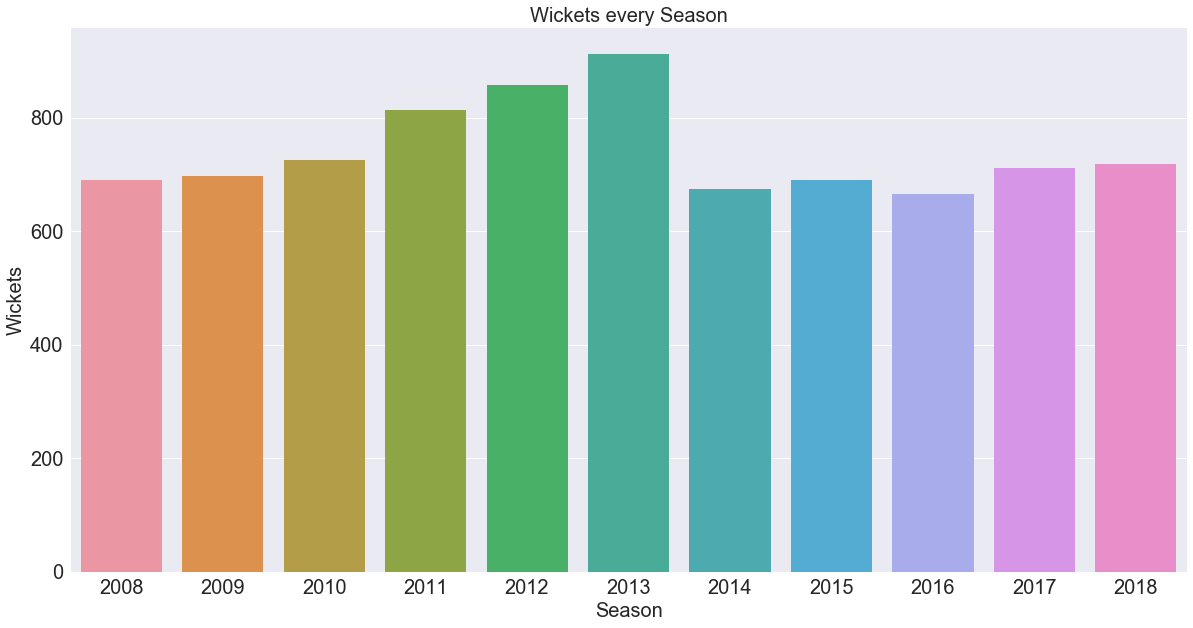

In [8]:
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x = 'season',y = 'player_dismissed', data = wickets_season)
plt.xlabel('Season',fontsize = 20)
plt.ylabel('Wickets',fontsize = 20)
plt.title('Wickets every Season',fontsize = 20)
plt.show()

This graph tells us about the total wickets that fell during each season. We see a sudden hike in wickets in 2012 and 2013. It may seem that more wickets were taken during that time. But that is not the correct interpretation as more number of matches were played during that season and hence the wicket are more. Hence to get better insight we will look at the average wickets per match for each season.

In [9]:
wicket_season_match = pd.DataFrame(data.groupby(['season','id']).count()['player_dismissed'])
wicket_season_match.reset_index(inplace = True)
wicket_season_match.columns =['season','id','total']
wicket_season_match

,season,id,total
0,2008,60,13
1,2008,61,9
2,2008,62,9
3,2008,63,12
4,2008,64,15
5,2008,65,12
6,2008,66,9
7,2008,67,12
8,2008,68,12
9,2008,69,19


In [10]:
wicket_season_match = pd.DataFrame(wicket_season_match.groupby('season').agg({'id' : 'count','total' : 'sum'}))
wicket_season_match

,id,total
season,,
2008,58,690
2009,57,698
2010,60,725
2011,73,813
2012,74,858
2013,76,912
2014,60,674
2015,59,691
2016,60,666


In [11]:
wicket_season_match['Wicket_Average'] = wicket_season_match['total']/wicket_season_match['id']
wicket_season_match.reset_index(inplace = True)
wicket_season_match

,season,id,total,Wicket_Average
0,2008,58,690,11.896552
1,2009,57,698,12.245614
2,2010,60,725,12.083333
3,2011,73,813,11.136986
4,2012,74,858,11.594595
5,2013,76,912,12.000000
6,2014,60,674,11.233333
7,2015,59,691,11.711864
8,2016,60,666,11.100000
9,2017,59,711,12.050847


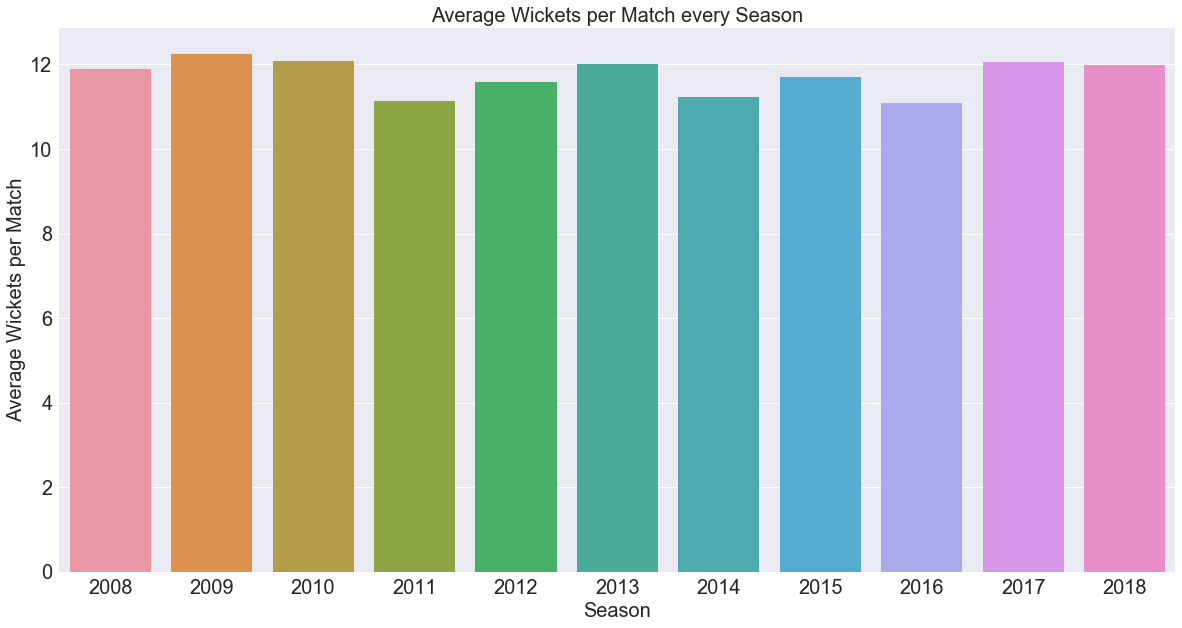

In [12]:
sns.barplot(x = 'season',y = 'Wicket_Average', data = wicket_season_match)
plt.xlabel('Season',fontsize = 20)
plt.ylabel('Average Wickets per Match',fontsize = 20)
plt.title('Average Wickets per Match every Season',fontsize = 20)
plt.show()

Now this gives us a better idea of the average number of wickets that fell in each match across all seasons

# Most wickets across season by each Team

In [13]:
wickets_team = pd.DataFrame(data.groupby(['season','bowling_team']).count()['player_dismissed'])
wickets_team.reset_index(inplace = True)
wickets_team.columns = ['season','bowling_team','wickets']
wickets_team = wickets_team.sort_values(by = ['season','wickets'],ascending = False)
wickets_team
#Required Dataset

,season,bowling_team,wickets
91,2018,Sunrisers Hyderabad,105
84,2018,Chennai Super Kings,99
87,2018,Kolkata Knight Riders,96
88,2018,Mumbai Indians,91
86,2018,Kings XI Punjab,84
90,2018,Royal Challengers Bangalore,84
85,2018,Delhi Daredevils,80
89,2018,Rajasthan Royals,80
81,2017,Rising Pune Supergiant,113
80,2017,Mumbai Indians,105


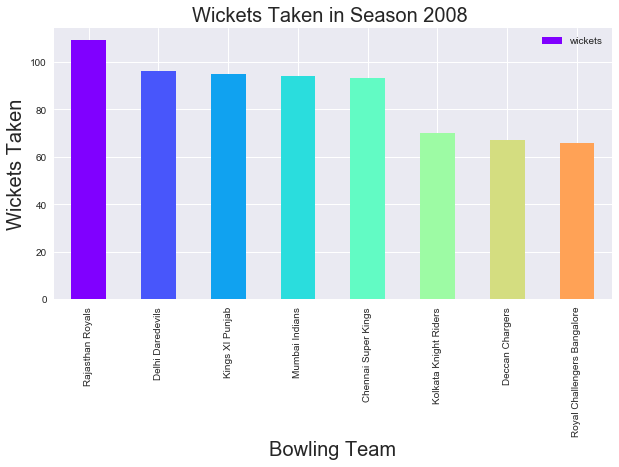

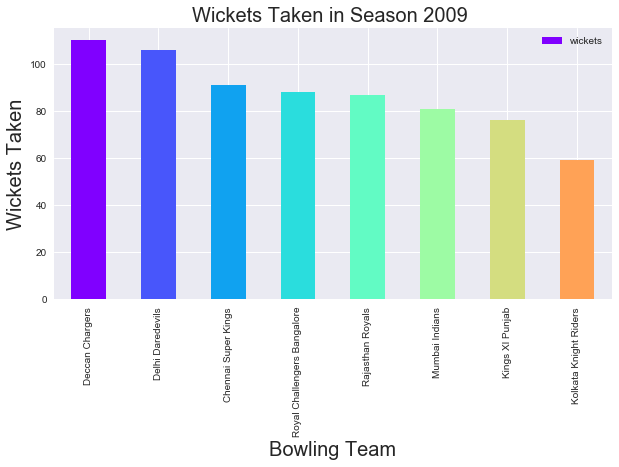

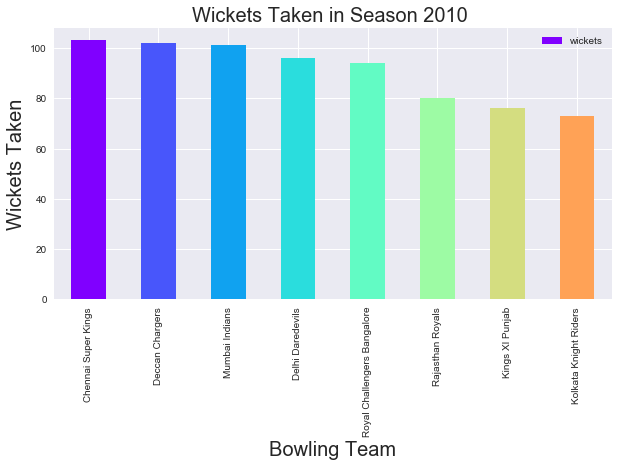

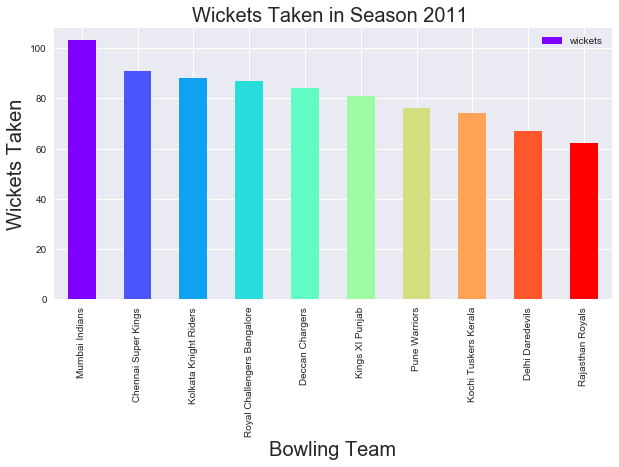

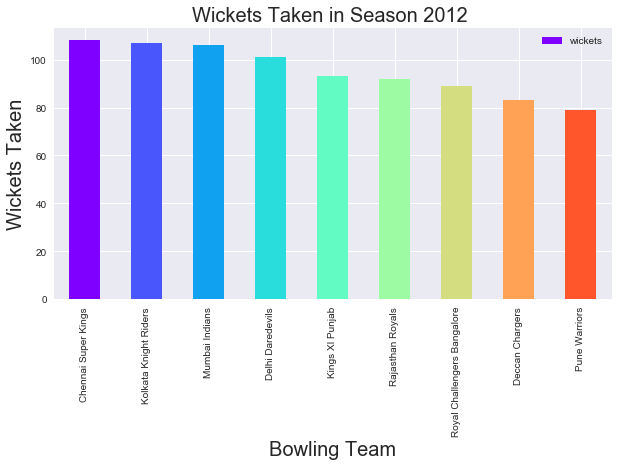

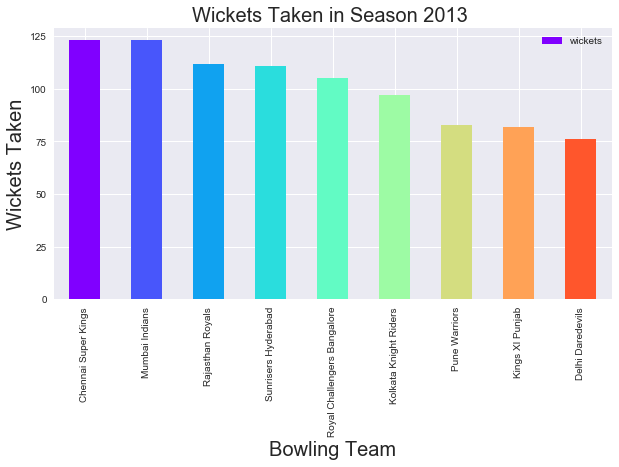

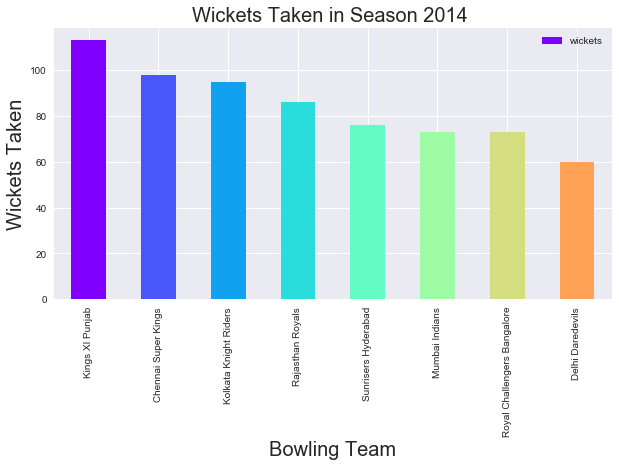

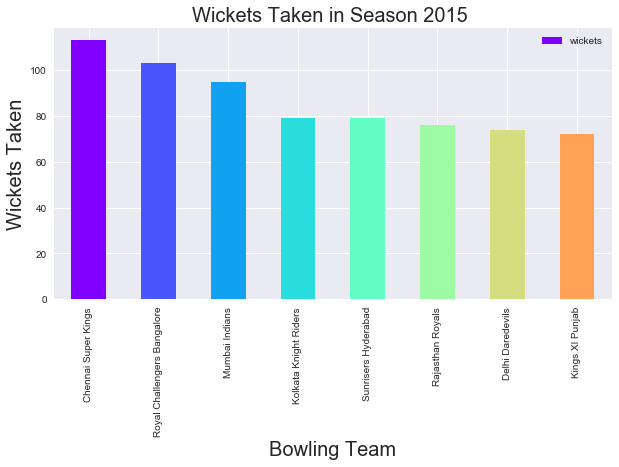

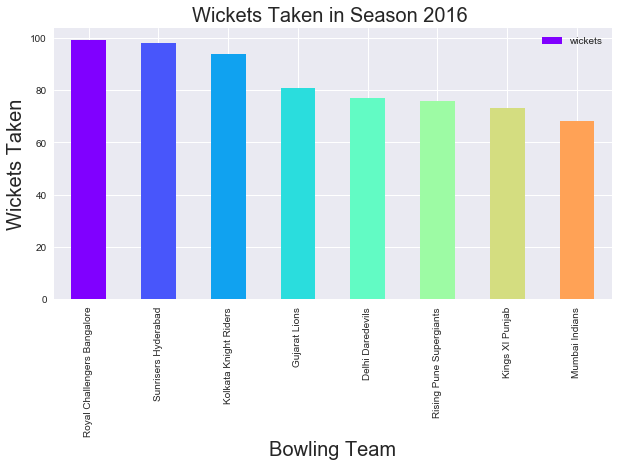

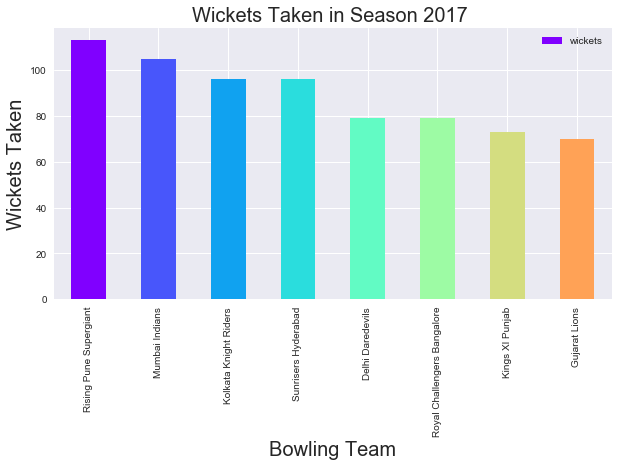

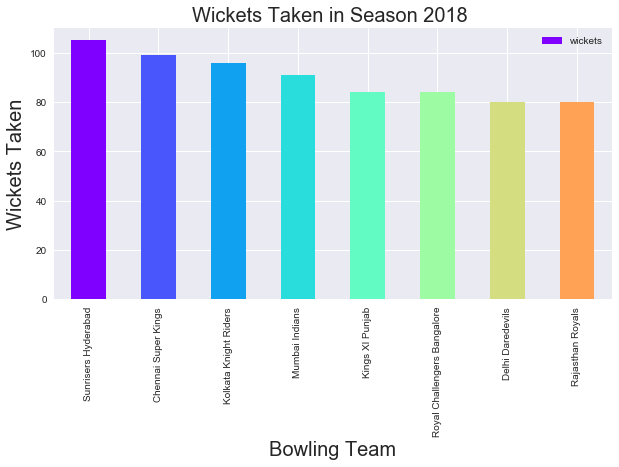

In [16]:
colors = cm.rainbow(np.linspace(0,1,10))
plt.rcParams['figure.figsize'] = [10, 5]
for title,group in wickets_team.groupby('season'):
    group.plot(x = 'bowling_team',y = 'wickets',kind = 'bar',title = title,color = colors,fontsize = 10)
    plt.xlabel('Bowling Team',fontsize = 20)
    plt.ylabel('Wickets Taken',fontsize = 20)
    plt.title('Wickets Taken in Season %s '%title,fontsize = 20)
    plt.legend(fontsize = 10)
plt.show()

This plot tells us about how each team has performed in all the years at IPL. Some teams are missing since they were not part of that particular edition of the IPL. We will not look at the average wickets per match since each team has played almost similar number of matches and we will not get any new insights from that.

Now we will look at the distribution of wickets per match for each team.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

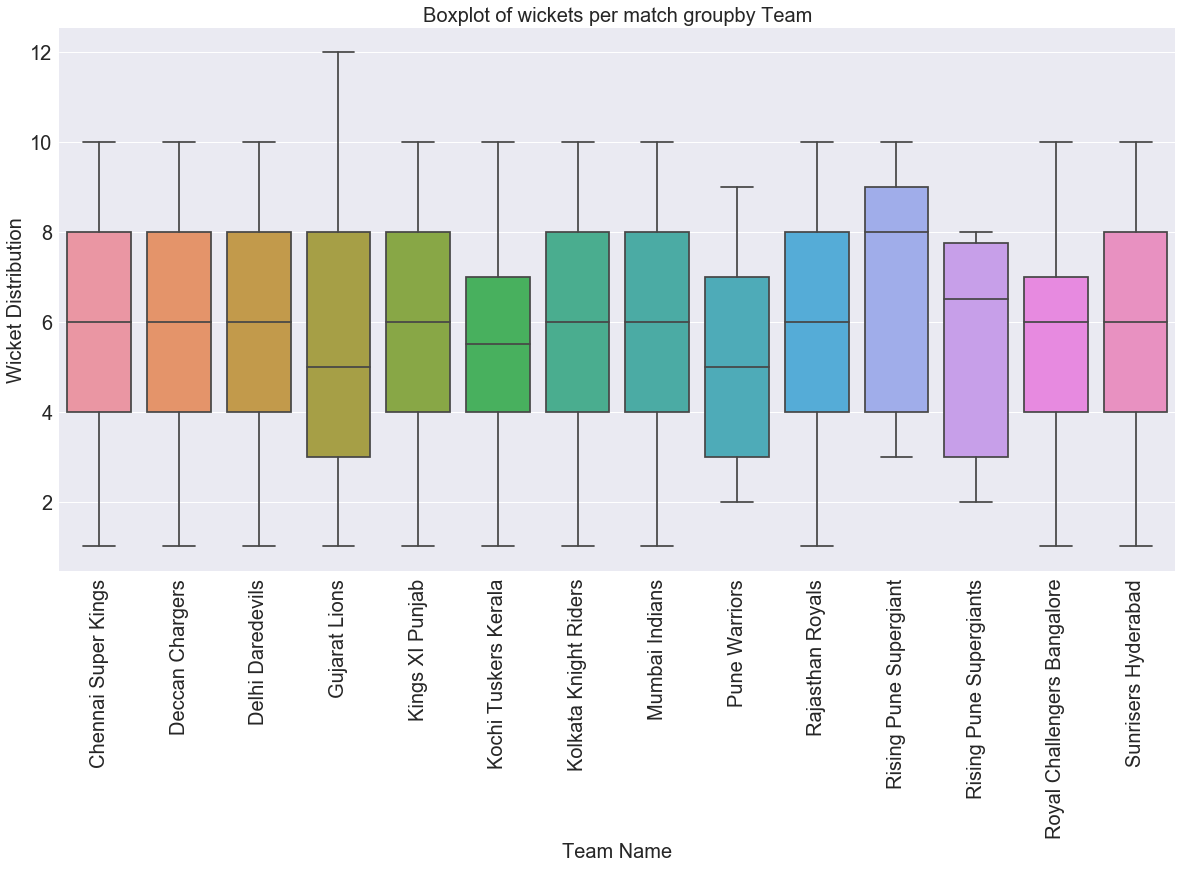

In [17]:
wickets_dist_team = pd.DataFrame(data.groupby(['bowling_team','id']).count()['player_dismissed'])
wickets_dist_team.reset_index(inplace = True)

plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(x = 'bowling_team',y = 'player_dismissed',data = wickets_dist_team)
plt.xlabel('Team Name',wrap =True,fontsize = 20)
plt.ylabel('Wicket Distribution',fontsize = 20)
plt.title('Boxplot of wickets per match groupby Team',fontsize = 20)
plt.xticks(rotation='vertical')

Here we can see that the median of the number of wickets in a match is similar for all the teams but the variance around median varies for different team. For some it is same on both sides of median, for some it is less on the higher side and for some it is less on the lower side.